In [29]:
from datetime import datetime
import os
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# add names of folders for Bluefors logs; should be dates formatted 'YY-MM-DD'
# assuming all the folders are inside the current directory

log_folder_list = ['25-07-24','25-07-25','25-07-26','25-07-27','25-07-28','25-07-29',
                  '25-07-30','25-07-31','25-08-01','25-08-02','25-08-03','25-08-04'];

In [32]:
# extracts data for each temperature channel for each date in folder list

log_entries_50K = [];
log_entries_4K = [];
log_entries_Still = [];
log_entries_MXC = [];

for log_date in log_folder_list:
    log_T_50K = os.path.join(log_date,'CH1 T '+log_date+'.log')
    log_T_4K = os.path.join(log_date,'CH2 T '+log_date+'.log')
    log_T_Still = os.path.join(log_date,'CH5 T '+log_date+'.log')
    log_T_MXC = os.path.join(log_date,'CH6 T '+log_date+'.log')
    
    with open(log_T_50K,'r') as f:
        for line in f:
            clean_line = line.strip()
            parts=clean_line.split(',')
            date_str=parts[0]
            time_str=parts[1]
            value_str=parts[2]
            
            datetime_str=f'{date_str} {time_str}'

            timestamp=datetime.strptime(datetime_str,'%d-%m-%y %H:%M:%S')
            value=float(value_str)
            if value == 0.0:
                value=np.nan
            log_entries_50K.append((timestamp,value))
            
    with open(log_T_4K,'r') as f:
        for line in f:
            clean_line = line.strip()
            parts=clean_line.split(',')
            date_str=parts[0]
            time_str=parts[1]
            value_str=parts[2]
            
            datetime_str=f'{date_str} {time_str}'

            timestamp=datetime.strptime(datetime_str,'%d-%m-%y %H:%M:%S')
            value=float(value_str)
            if value == 0.0:
                value=np.nan

            log_entries_4K.append((timestamp,value))    
            
    with open(log_T_Still,'r') as f:
        for line in f:
            clean_line = line.strip()
            parts=clean_line.split(',')
            date_str=parts[0]
            time_str=parts[1]
            value_str=parts[2]
            
            datetime_str=f'{date_str} {time_str}'

            timestamp=datetime.strptime(datetime_str,'%d-%m-%y %H:%M:%S')
            value=float(value_str)
            if value == 0.0:
                value=np.nan

            log_entries_Still.append((timestamp,value)) 
            
    with open(log_T_MXC,'r') as f:
        for line in f:
            clean_line = line.strip()
            parts=clean_line.split(',')
            date_str=parts[0]
            time_str=parts[1]
            value_str=parts[2]
            
            datetime_str=f'{date_str} {time_str}'

            timestamp=datetime.strptime(datetime_str,'%d-%m-%y %H:%M:%S')
            value=float(value_str)
            if value == 0.0:
                value=np.nan

            log_entries_MXC.append((timestamp,value))    

In [33]:
# sort and unpack timestamp and temperature data

log_entries_50K.sort()
timestamps_50K,values_50K=zip(*log_entries_50K)
log_entries_4K.sort()
timestamps_4K,values_4K=zip(*log_entries_4K)
log_entries_Still.sort()
timestamps_Still,values_Still=zip(*log_entries_Still)
log_entries_MXC.sort()
timestamps_MXC,values_MXC=zip(*log_entries_MXC)

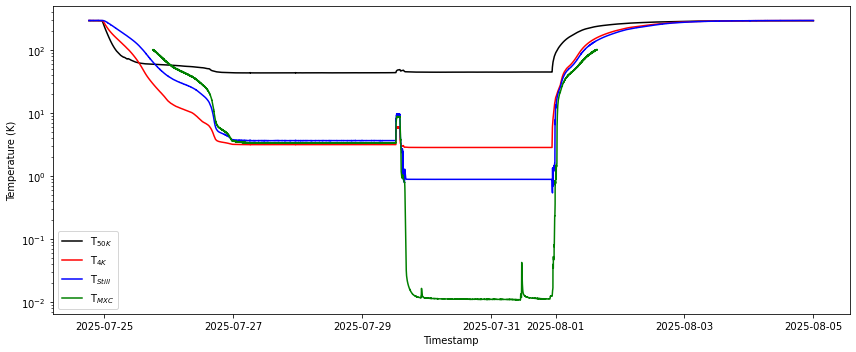

In [36]:
# plot temperature vs time, y-axis log scale for better visibility

plt.figure(figsize=(12,5))
plt.plot(timestamps_50K,values_50K,label=r'T$_{50K}$',color='black')
plt.plot(timestamps_4K,values_4K,label=r'T$_{4K}$',color='red')
plt.plot(timestamps_Still,values_Still,label=r'T$_{Still}$',color='blue')
plt.plot(timestamps_MXC,values_MXC,label=r'T$_{MXC}$',color='green')
plt.yscale('log')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (K)')
plt.legend()
plt.show()